In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [2]:
from matplotlib import pyplot as plt

In [3]:
import pandas as pd

In [6]:
# create one csv file for train
train_seqs = []
train_lens = []

seqs = SeqIO.parse(open('./train-nontoxins.fasta'), 'fasta')
for fasta in seqs:
    seq = Seq(str(fasta.seq).upper())
    train_lens.append(len(fasta.seq))
    train_seqs.append(SeqRecord(seq, id=fasta.id, description=fasta.description))

seqs = SeqIO.parse(open('./train-toxins.fasta'), 'fasta')
for fasta in seqs:
    seq = Seq(str(fasta.seq).upper())
    train_lens.append(len(fasta.seq))
    train_seqs.append(SeqRecord(seq, id=fasta.id, description=fasta.description))

# with open("train.fasta", "w") as output_handle:
#     SeqIO.write(train_seqs, output_handle, "fasta")
# with open("train1002.fasta", "w") as output_handle:
#     SeqIO.write(train_seqs1002, output_handle, "fasta")

train_examples = []
for fasta in train_seqs:
    molId = fasta.id
    seq = str(fasta.seq)
    label = 0 if fasta.description.startswith('nontox') else 1
    train_examples.append([molId, seq, label])

train_set = pd.DataFrame(train_examples, columns=['id', 'sequence', 'label'])

In [7]:
train_set.to_csv('../../model/ToxIBTL/newData/train.csv')

In [8]:
# create one csv file for test
test_seqs = []
test_lens = []

seqs = SeqIO.parse(open('./test-nontoxins.fasta'), 'fasta')
for fasta in seqs:
    seq = Seq(str(fasta.seq).upper())
    test_lens.append(len(fasta.seq))
    test_seqs.append(SeqRecord(seq, id=fasta.id, description=fasta.description))

seqs = SeqIO.parse(open('./test-toxins.fasta'), 'fasta')
for fasta in seqs:
    seq = Seq(str(fasta.seq).upper())
    test_lens.append(len(fasta.seq))
    test_seqs.append(SeqRecord(seq, id=fasta.id, description=fasta.description))

# with open("test.fasta", "w") as output_handle:
#     SeqIO.write(test_seqs, output_handle, "fasta")
# with open("test1002.fasta", "w") as output_handle:
#     SeqIO.write(test_seqs1002, output_handle, "fasta")

test_examples = []
for fasta in test_seqs:
    label = 0 if fasta.description.startswith('nontox') else 1
    molId = fasta.id
    seq = str(fasta.seq)
    test_examples.append([molId, seq, label])

test_set = pd.DataFrame(test_examples, columns=['id', 'sequence', 'label'])

In [9]:
test_set.to_csv('../../model/ToxIBTL/newData/test.csv')

## Analyze data

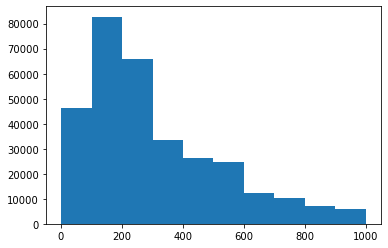

In [10]:
plt.hist(train_lens)
plt.show()

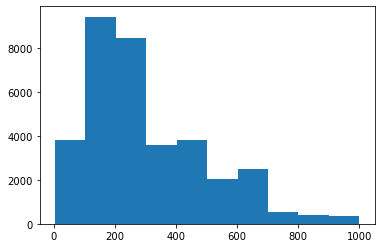

In [11]:
plt.hist(test_lens)
plt.show()

In [35]:
seqs = SeqIO.parse(open('../../model/ToxIBTL/originalData/protein_train.fa'), 'fasta')
lens = []
for fasta in seqs:
    lens.append(len(fasta.seq))

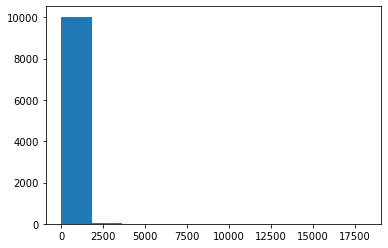

In [39]:
plt.hist(lens)
plt.show()